# Meta Quest 2 ProductSentiment Analysis and Topic Modeling of Reviews


## Abstract

This study aims to analyze the sentiment and identify the main topics discussed in Meta Quest 2 product reviews scraped from the Argos website using Selenium. To achieve this goal, we first preprocessed the reviews by removing unwanted characters and applying text preprocessing techniques. Then, we applied sentiment analysis using a machine learning classifier to classify the reviews into positive, negative, and neutral categories. Finally, we used topic modeling to identify the main themes discussed in the reviews. The results of the sentiment analysis showed that a majority of the reviews were positive, while the topic modeling revealed that the main topics discussed included battery life, fun and overall satisfaction. the results are visualized using word cloud and line charts. The insights gained from this analysis can potentially be useful for understanding customer opinions and preferences, as well as identifying potential issues or areas for improvement in the VR headset.




# 1. Introduction
<p> Virtual reality (VR) headsets have become increasingly popular in recent years, offering a new level of immersion and interactivity for gaming, entertainment, education and even socializing. As the VR industry continues to grow, it is important for companies to understand the sentiment and concerns of their customers in order to improve the user experience and stay competitive in the market [1]. With the emergence of the metaverse, a virtual world that is accessed through the internet and where people can interact with each other and virtual objects, it is even more crucial for businesses to understand the sentiment and topics being discussed by VR headset users. </p>
<p>
The Meta (Oculus) Quest 2 offers a good value for its price [2] and has a large selection of available content. By analyzing the sentiment and identifying the main topics discussed in reviews of the Meta Quest 2, businesses and developers can gain insights into customer opinions and preferences, as well as identify potential areas for improvement in the product. The Meta Quest 2's wide selection of content and versatility in terms of use make it an ideal subject for such analysis.
</p>

## 1.1. Context
<p>
Sentiment analysis (also known as opinion mining or emotion AI) is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information [3]. This allows us to understand the emotional tone and sentiment expressed in the text by classifying the text into positive or negative or neutral. which is why Sentiment analysis uses supervised machine learning approach.
</p>
<p>
Topic modeling is an unsupervised machine learning approach for identifying and extracting the most important themes or topics from a collection of texts. It is a crucial aspect of natural language processing (NLP) as it allows us to identify and analyze the most relevant information contained in a large corpus of text. By reducing the number of features (i.e., words) that we need to consider, we can focus our attention on the most meaningful and relevant content, rather than being overwhelmed by the sheer volume of data [4]. This enables us to more effectively analyze and understand the underlying themes and concepts contained in the texts.  
</p>



## 1.2. Aims and objectives
The main aim of this notebook, is to analyze the sentiment of the reviews and identify the main topics discussed in Meta Quest 2 product reviews scraped from the Argos website with the help of visualizations

### 1.2.1. Methodology
Here's the approach that we will be taking for our analysis described in the following steps:
- Scrape product reviews from the Argos website.
- Preprocess the data by cleaning and standardizing it for further analysis.
- Perform sentiment analysis on the reviews to determine the overall sentiment expressed in each review.
- Identify the main topics discussed in the reviews using topic modeling.
- Analyze the reviews for each identified topic to gain insights into the specific issues or aspects that are being discussed.
- Break down the sentiment analysis results by topic to understand how the sentiment varies across different topics.
- Communicate the findings effectively through the use of visualization techniques such as bar charts and wordcloud.


### 1.2.2. Asking the Questions that will guide us through our Analysis
Asking relevant and focused questions in the pre-analysis stage is important for guiding the direction of the analysis and ensuring that we draw meaningful conclusions, Here are some questions that will explore in our analysis:

- What are some common themes that emerge across the different topics?
- Are there any trends or patterns in customer sentiment that stand out?
- Is there a relationship between the sentiment of the reviews and the topics discussed?
- How can the insights gained from this analysis be used to improve the product or the customer experience?



## 1.3. Dataset and Limitations

### 1.3.1. Dataset
For the purpose of this project, we utilize the Selenium web scraping library to obtain a dataset of reviews for the Meta Quest 2 virtual reality headset from the Argos website, a leading retailer in the United Kingdom. The reason is, we can use the Selenium library due to its ability to handle dynamic websites (website that generates content on the fly using server-side programming languages) which will be needed for scraping the reviews.

Here's an overview of our dataset:

- Source: Scraped from Argos website
- Size: 1310 records, 4 columns
- Variables:
  - `title`: Title of the product being reviewed
  - `reviews`: Text of the review
  - `location`: Location of the reviewer
  - `timestamp`: Date and time of the review submission
- Format: CSV flat file
- Scraping:
  - `user_info` and `timestamp` were first scraped from the Argos website.
  - `user_info` contains the title, review, and location for each review, in that order.
  - `timestamp` contains the datetime of the review.
  - Data was then stored in two lists (`user_info` and `timestamp`) locally using pickle.
- Preprocessing:
  - `user_info` and `timestamp` were merged into a dictionary.
  - The dataset was labeled.
  - The labeled dataset was then stored locally as a CSV file.
  - Minor formatting issues corrected.
  - Datetime formatting was applied to the `timestamp` column.
  - Text preprocessing was performed on the `title`, `reviews`, and `location` columns.
  
### 1.3.2. Limitations
It is important that we consider the limitations of our dataset when interpreting the results. Here are some factors that should be taken into account in our results:

- We limited the data used in this study to reviews from the Argos website for a single VR headset (Meta Quest 2). This means that the results may not be representative of the broader market for VR products. We must consider this limitation when interpreting the results of the study.
- The Argos website is only available in the United Kingdom. This means that the results of the analysis may not be representative of the broader market for VR products outside of the UK.
- The Reviews on Argos may differ in terms of content, sentiment, and other characteristics from reviews on other websites. Therefore we must consider this when interpreting the results of the study, and be mindful of the potential for bias due to the limited geographical scope.
- The results of the topic modeling is influenced by the choice of modeling algorithm and the number of topics selected. Different choices may lead to slightly different results.




## 1.4. Ethical considerations 
We need to be aware of the legal and ethical implications of scraping data from the Argos website and how we plan to use this data for our study, here are the Ethical considerations related to the Argos website:

- According to the website terms and conditions of Argos, scraping data for non-commercial purposes is permitted. This means that individuals or organizations may use web scraping techniques to extract data from the Argos website for research or personal use, as long as the data is not being used for commercial gain. [5]
- According to the website terms and condition of Argos, it is legal to use data that is publicly available, provided that it is used ethically and in accordance with the terms and conditions of the website. [5]  
- According to the information contained in the robots.txt file of the Argos website, it does not appear that scraping reviews is explicitly disallowed. [6]





## 1.5. Dependencies

The following code will create a text file called requirements.txt that lists all the dependencies needed for this notebook

In [1]:
!pip freeze > requirements.txt

use ` pip install -r requirements.txt ` to install all the packages and versions listed in the requirements.txt

In [ ]:
# pip install -r requirements

# 2. Extracting Product Reviews from the Web with Selenium

Web scraping is the process of extracting data from websites by using automated tools or programs. It is a useful technique for collecting large amounts of data from websites, especially when the data is not readily available for download. In this study, we used Selenium, a popular web automation tool, to scrape product reviews from the Argos website. 

Selenium is an open-source library that allows developers to write scripts in various programming languages to automate web browser interactions. It can simulate user actions such as clicking links, filling out forms, and navigating pages, and it can extract data from the web pages by using techniques such as web element selection, DOM parsing, and XPath queries. [7] 

For our study, we use Selenium to navigate to the product page of Meta Quest 2 VR on the Argos website and retrieve the reviews, user information of the reviewer, and timestamp of the review. We write code that uses the Selenium webdriver to open a web browser, navigate to the product page, and extract the data from the page elements. We also implement error handling and retry logic to ensure that the script can handle any issues that might arise during the scraping process, such as network errors or changes in the page structure. Here's the explanation in a procedural way
    
<ol>
    <li>The Chrome web driver opens and navigates to the specified URL.</li>
    <li>The cookie consent prompt is clicked to accept cookies.</li>
    <li>The <code>reviews</code> button is clicked to navigate to the reviews section of the page.</li>
    <li>The code iterates through each page of reviews:
        <ol>
            <li>The code tries to locate the 'show more' button using the first specified XPATH. If the button is not found within the specified time, the TimeoutError exception is caught.</li>
            <li>If the TimeoutError exception is caught, the code tries to locate the 'show more' button using the second specified XPATH. If the button is not found within the specified time, the TimeoutError exception is caught and a message is printed.</li>
            <li>If the 'show more' button is found, it is clicked.</li>
        </ol>
        </li>
    <li>The reviews section of the page is located and stored in a variable.</li>
    <li>All <code>p</code> tags within the reviews section are found and stored in a list called <code>reviews.</code></li>
    <li>All <code>time</code> tags within the reviews section are found and stored in a list called <code>scraped_timestamps</code>.</li>
    <li>The code iterates through the "reviews" list and appends the text of each element to a new list called <code>reviews_list</code>.</li>
    <li>The code iterates through the ´scraped_timestamps´ list and appends the datetime attribute of each element to a new list called <code>timestamps</code>.</li>
    <li>The web driver browser closes.</li>
    <li>The <code>reviews_list</code> and <code>timestamps</code> lists are returned.</li>
</ol>

<code>note that it can take up to 5 to 10 minutes depending on max pages input has been selected to finish scraping.</code>

In [ ]:
# import selenium library and webdriver modules
import selenium
from selenium import webdriver

# import By class and Options class from selenium.webdriver.
# By is used to specify which elements on the page to locate,
# Options is used to set options for the Chrome web browser.
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options

# import NoSuchElementException from selenium.common.exceptions for error handling.
from selenium.common.exceptions import NoSuchElementException

# import WebDriverWait and expected_conditions from selenium.webdriver.support
# WebDriverWait is used to wait for elements to load on the page,
# expected_conditions is used to define conditions for waiting for elements to load on the page
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC


def scrape_reviews(url, maxPages):
    import time
    driver = webdriver.Chrome()
    driver.get(url)
    print(driver.title)

    # press cookies button
    cookie = driver.find_element(By.ID, 'consent_prompt_submit')
    cookie.click()

    # opens the review section
    reviewsBtn = driver.find_element(By.ID, 'reviews')
    reviewsBtn.click()
    
    currentPage = 1
    while currentPage <= maxPages:
        time.sleep(1)
        # stores the path of show more button
        btn_XPATH = '//*[@id="reviews-accordion-accordion-content-reviews-accordion"]/div/div/div/div[2]/div[2]/span[' + str(currentPage) + '1]/button'
        # print(btn_XPATH)

        # define the maximum amount of time to wait
        wait_time = 10

        # try to locate the show more button using the By XPATH
        try:
            showBtn = WebDriverWait(driver, wait_time).until(
                EC.presence_of_element_located((By.XPATH, btn_XPATH))
            )
            showBtn.click()
            currentPage += 1

        # if the show more button is not found using the By XPATH method, catch the TimeoutError exception
        except:
            # try to locate the show more button using the By CLASS_NAME method
            try:
                showBtn = WebDriverWait(driver, wait_time).until(
                    EC.presence_of_element_located((By.XPATH, '//button[@data-test="show-x-more-reviews-button"]'))
                )
                showBtn.click()
                currentPage += 1
            except TimeoutError:
                # the show button was not found using either strategy
                print("show button could not be located...")
                currentPage += 1


    # stores the reviews section
    reviews_section = driver.find_element(By.ID, 'reviews-accordion-accordion-content-reviews-accordion')  
    # stores all p tags of the reviews section
    reviews = reviews_section.find_elements(By.TAG_NAME, 'p')
    # stores all the scraped time
    scraped_timestamp = reviews_section.find_elements(By.TAG_NAME, 'time')
    
    # list to store the text of each review (title, review, location)
    reviews_list = []
    # iterates through the list of review elements
    for review in reviews:
        # stores the text of the reviews element to the list
        reviews_list.append(review.text)

    # list to store the datetime attributes of the scraped 'time' elements
    timestamps = []
    # iterates through the list of scraped 'time' elements
    for time in scraped_timestamp:
        # gets the datetime attribute of the time element 
        datetime = time.get_attribute("datetime")
        # stores datetime to the list
        timestamps.append(datetime)
        
    ## closes the browser
    driver.close()
    
    return reviews_list, timestamps

url = "https://www.argos.co.uk/product/9461987?clickSR=slp:term:meta%20quest%202:2:22:1"
user_info, timestamps = scrape_reviews(url=url, maxPages=130)


We save the lists to a local file because it allows us to use them for preprocessing to avoid errors and repetition. Scraping data from websites can be unreliable due to the possibility of changes in the structure of the website's Document Object Model. By saving the data locally, we can use it for preprocessing without the risk of it being affected by changes to the website and  saving the data locally allows us to access it more easily and avoid the need to scrape the website again, which can save time and resources.

In [ ]:
import pickle

In [ ]:
# Save the reviews_list and timestamps into a file
with open('data.pkl', 'wb') as f:
    pickle.dump((user_info, timestamps), f)

In [ ]:
# Load the reviews_list and timestamps from the file
with open('data.pkl', 'rb') as f:
    user_info, timestamps = pickle.load(f)

# 3. Data Preprocessing
<p>
The next step is preprocessing the data. it helps to ensure that the data is clean, consistent, and ready for analysis, and can improve the accuracy and effectiveness of the sentiment analysis and topic modeling techniques.
</p>

## 3.1. Labeling the data
<p>
    
The first step in preprocessing the data is to use the Pandas library to label the data. This involves assigning appropriate names to the columns of the DataFrame. We will assign the names 'Title', 'Review', 'Location', and merge the timestamp list into the dataFrame as 'timestamp' to the columns of the DataFrame. This will help to clarify the meaning and purpose of each column, and will allow us to manipulate and analyze the data using these meaningful names. 
</p>

In [ ]:
import pandas as pd
import csv

def label_reviews(user_info):
    reviews_dict = {}
    for i in range(0, len(user_info), 3):
        title = user_info[i]
        review = user_info[i+1]
        location = user_info[i+2]
        reviews_dict[i] = {
            'title': title,
            'reviews': review,
            'location': location
    }
        
    return reviews_dict


def generate_df(reviews, timestamps):
    df = pd.DataFrame.from_dict(reviews, orient='index').reset_index(drop=True).drop(index=0)
    df = df[['title', 'reviews', 'location']]
    
    # We need to pad/truncate the timestamps list to match the length of the DataFrame
    
    # if length of timestamps is less than length of df:
    # pad timestamps with None values until length of timestamps is equal to length of df
    # else if length of timestamps is greater than length of df
    # truncate timestamps to length of df
    # add timestamps as a column to df with name 'timestamp' and return df
    if len(timestamps) < len(df):
        # pad timestamps with None values to match the length of the index
        timestamps += [None] * (len(df) - len(timestamps))
    elif len(timestamps) > len(df):
        # truncate timestamps to match the length of the index
        timestamps = timestamps[:len(df)]
    df.insert(loc=3, column='timestamp', value=timestamps)
    return df

reviews = label_reviews(user_info)
scraped_df = generate_df(reviews, timestamps)
scraped_df.head()


We save our labeled scraped_df DataFrame into a csv file `data.csv` since using a locally saved CSV file is more reliable and faster for further analysis. We also don't need to scrape the website again to get the dataset.

In [ ]:
# scraped_df.to_csv('data.csv')
scraped_df.to_csv('new_data.csv')



<code>please load the data.csv CSV File that I provided to get the same results in this study by running the cell below</code>

In [2]:
import pandas as pd

# Set the maximum length of the string to display
pd.set_option('display.max_colwidth', None)

try:
    # Read the CSV file into a dataframe
    df = pd.read_csv('data.csv')
except Exception as e:
    print("Error opening file:", e)
    
df.isnull().sum()

Unnamed: 0    0
title         0
reviews       0
location      0
timestamp     0
dtype: int64

In [3]:
# Drop column 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)
# Print the data type of each column
print(df.dtypes)

title        object
reviews      object
location     object
timestamp    object
dtype: object


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1310 non-null   object
 1   reviews    1310 non-null   object
 2   location   1310 non-null   object
 3   timestamp  1310 non-null   object
dtypes: object(4)
memory usage: 41.1+ KB


## 3.2. Preprocessing datetime

The next step in our data preprocessing process is to preprocess the timestamps data into a datetime object. This involves converting the timestamps from their current format, which is a string, into a datetime object, then into Year-Month-Day form so that can be easily manipulated and analyzed. 


In [5]:
df.timestamp

0       2022-12-22T00:00:00.000Z
1       2022-12-21T00:00:00.000Z
2       2022-12-21T00:00:00.000Z
3       2022-12-14T00:00:00.000Z
4       2022-12-13T00:00:00.000Z
                  ...           
1305    2021-09-22T00:00:00.000Z
1306    2021-09-22T00:00:00.000Z
1307    2021-09-21T00:00:00.000Z
1308    2021-09-21T00:00:00.000Z
1309    2021-09-21T00:00:00.000Z
Name: timestamp, Length: 1310, dtype: object

In [6]:
from datetime import datetime
# convert the 'timestamp' column to datetime object
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ"))

# Create a new column with the year, month, and day in the format "yyyy-mm-dd"
df['timestamp'] = df['timestamp'].apply(lambda x: x.strftime("%Y-%m-%d"))

Text(0, 0.5, 'Reviews count')

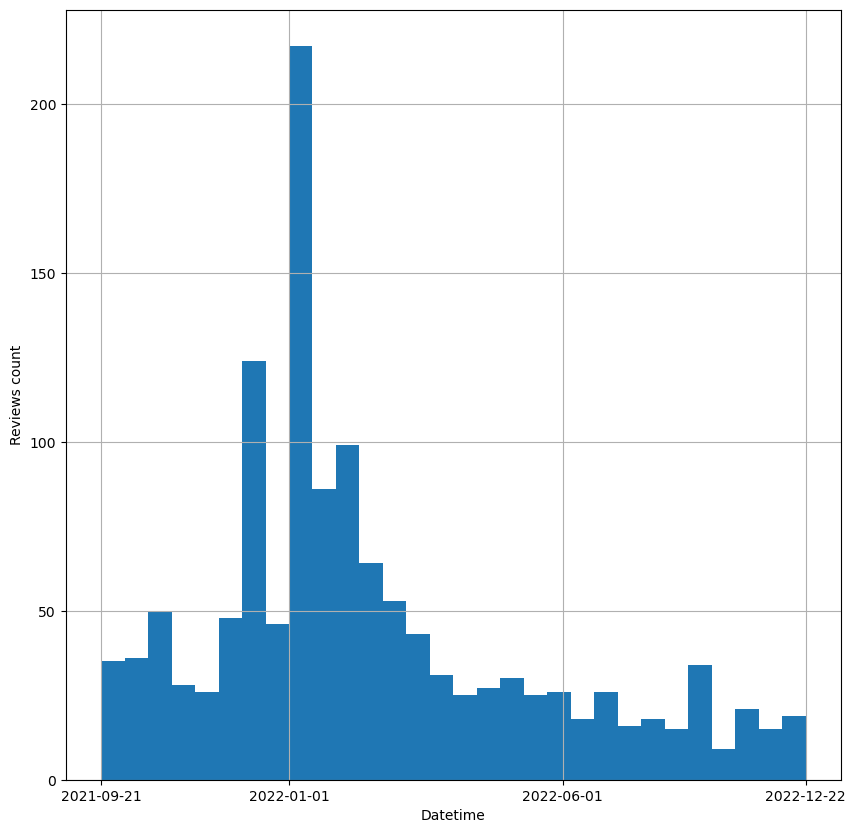

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 10))
df.timestamp.hist(bins=30)
plt.xticks(["2021-09-21", "2022-01-01", "2022-06-01", "2022-12-22"])
plt.gca().invert_xaxis()
plt.xlabel("Datetime")
plt.ylabel("Reviews count")

Here we can see the number of reviews for different time periods. We can see a strong peak in reviews around the new year and christmas period most likely due to more sales during this period.

## 3.3. Text Preprocessing
The next step of our process is to clean and filter the noise from the text by using regular expressions and natural language processing tools (NLTK) to get accurate results in our analysis. 

In [8]:
import re
import nltk
import numpy as np

# Download the stopwords dataset from NLTK
nltk.download('stopwords')

# Download the wordnet dataset from NLTK (useful for text classification)
nltk.download('wordnet')

# downloads the the Open Multilingual WordNet "omw" dataset from NLTK
nltk.download('omw-1.4')

# download the vader, pre-trained model for sentence segmentation from NLTK for later use.
nltk.download('vader_lexicon')

# download punkt, pre-trained lexicon for Sentiment Analysis from NLTK for latere use
nltk.download('punkt')

# import stop words from NLTK
from nltk.corpus import stopwords

# import word tokenizer from NLTK
from nltk.tokenize import word_tokenize

# import word Lemmatizer from NLTK
from nltk.stem import WordNetLemmatizer

# import a list of stop words in the English language from NLTK
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHiFT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SHiFT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SHiFT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\SHiFT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHiFT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 3.3.1. Preprocessing User Info
We preprocess the user info data in order to extract the city, age group as well as the country for each user. We also look at the missing data and handle it accordingly. First we can visualise some examples:

In [9]:
df.location.iloc[:10]

0    bg0139, 25 - 34, Ankara, turkey
1           Donatas, 35 - 44, London
2           Nilu, 35 - 44, Droitwich
3            Mandy, 45 - 54, Prescot
4           Racka, 45 - 54, Teesside
5           Mick, 35 - 44, Mansfield
6           Denisa, 25 - 34, Bristol
7       Suesmillai, 45 - 54, Bookham
8      SmileyKaz, 45 - 54, Edinburgh
9     Sandra, 55 - 64, Carrickfergus
Name: location, dtype: object

We can see that here we have the username, age range, city and country such as turkey or county. We can expand this information into separate columns for further analysis:

In [10]:
df[["age", "city", "country"]] = df.location.str.split(',', expand=True).iloc[:, [1, 2, 3]]
df = df.drop("location", axis=1)

Lets look in more detail at each variable starting with age:

#### 3.3.1.1. Analyse reviews count by age

In [11]:
# Percentage of missing values
df.age.isna().mean() * 100

0.0

We can see that there is no missing values for age. 

<AxesSubplot:>

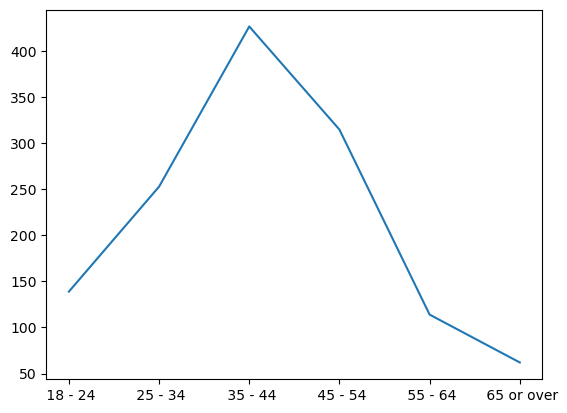

In [12]:
df.age.value_counts().sort_index().plot()

We can see most the users are in the range 35-44 with a distribution resembling a gaussian around this value.

#### 3.3.1.2. Analyse reviews count by city

In [13]:
# Percentage of missing values
df.city.isna().mean() * 100

6.412213740458015

We can see we have more missing values for city than for age. We set values to lower case and strip additional white space.

In [14]:
df["city"] = df["city"].str.lower().str.strip()

In [15]:
df.city.value_counts()[-20:]

balloch loch lomond    1
grantham               1
swiss cottage          1
teddington             1
bognor                 1
n.e lincs              1
newbury                1
eastleigh              1
bham                   1
heywood                1
rochdale               1
redruth                1
hampshire u.k.         1
anglesey               1
br5 2bl                1
up north               1
holt norfolk           1
formby                 1
bangor                 1
london walthamstow     1
Name: city, dtype: int64

We can see some strange and likely wrong values such as "up north", "Swiss Cottage" and "n.e lincs". It seems likely these are due to the values being open text for the users to enter rather than pre-defined categorical values.

One way to filter out noise in this variable could be to consider values that have more than one entry. Ofcourse we would also be ignoring smaller cities that have a single entry yet it would remove alot of noise in the data.


In [16]:
vc = df.city.value_counts()
# we can extract cities with one value count
cities_one_count = vc[vc == 1].index.to_list()
print(f"Number of cities with an entry count of 1: {len(cities_one_count)}")
df.city[df.city.isin(cities_one_count)] = np.nan

Number of cities with an entry count of 1: 312


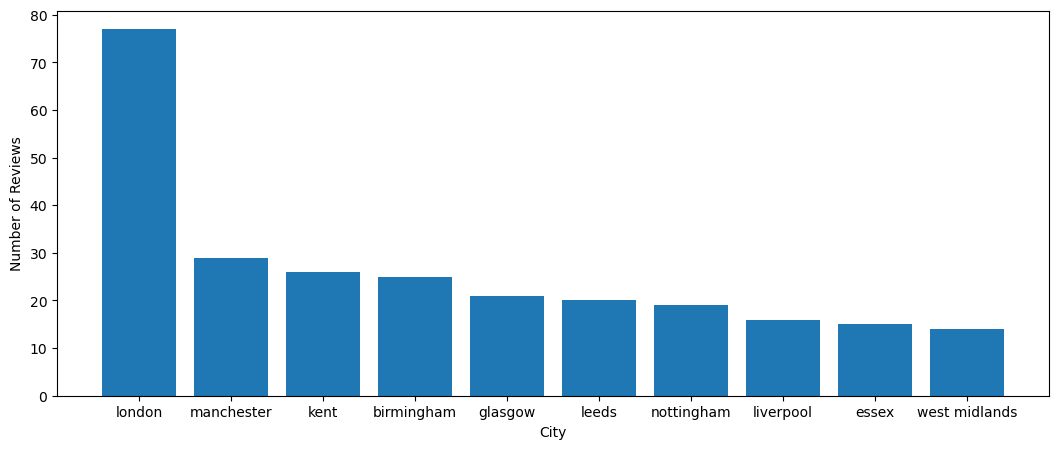

In [17]:
# get the top cities by using counter then sorting the values and finally get only the first 5
top_cities = df['city'].value_counts().sort_values(ascending=False).head(10)

fig = plt.figure(figsize = (12.8, 5))
# plot a bar chart of review counts by city
plt.bar(top_cities.index, top_cities)
plt.xlabel('City')
plt.ylabel('Number of Reviews')
# show the plot
plt.show()

We can see the main cities with reviews, which correspond to the largest cities in the UK such as London and Manchester. They may have more robust infrastructure or support for VR technology, which could make it easier for consumers in these areas to use and review VR headset products. 

#### 3.3.1.3. Analyse reviews count by country

In [18]:
# Percentage of missing values
df.country.isna().mean() * 100

91.29770992366413

Here we can see the country is very often missing.

In [19]:
# We see that there are empty spaces surrounding the text which we handle 
df["country"] = df.country.str.lower().str.strip()

In [20]:
df.country.value_counts().iloc[:25]

uk                       51
west midlands             4
scotland                  3
lancashire                2
essex                     2
hampshire                 2
london                    2
west yorkshire            2
leicestershire            2
england                   1
united kingdom            1
maghull                   1
berks                     1
north yorkshire           1
port talbot               1
roehampton                1
derby                     1
carmarthen                1
co durham                 1
south west                1
gloucester                1
oxfordshire               1
medway                    1
greater london            1
blackburn with darwen     1
Name: country, dtype: int64

We can see that the main value used here is "uk" with 51 entries followed by "Scotland" with only 3 entries. Often a county is given such as "West Yorkshire". Also there are naming inconsistencies such as uk also being called "united kingdom".

We decide to drop this variable since it is very often missing and there are inconsistent labelling between counties and country.

In [21]:
df = df.drop("country", axis=1)

## 3.4. Preprocessing and cleaning text data for Sentiment Analysis
In order to get accurate results from sentiment analysis and topic modeling, we develop functions that filter and pre-process text by:

- Implementing regular expressions to strip special characters and punctuation marks. 
- Implementing NLTK for to remove stop words and perform tokenization and lemmatization on the remaining words.
- Concatenating the filtered and pre-processed words to create a cleaned version of the text.
     
**Lemmatization** is the process of reducing a word to its base form. It  produce more accurate and meaningful forms of words than stemming. Hence, lemmatization is often preferred over stemming for tasks that require a high degree of accuracy or interpretability [11], which is needed in sentiment analysis and topic modeling.


In [22]:
# function that removes special characters, punctuations, extra whitespace from text
def strip_special_characters(text):    
    # compile a regular expression pattern that matches one or more spaces
    pattern = re.compile('\s+')
    
    # removes any special characters and punctuations from text
    clean_text = re.sub(r'[^\w\s]',' ',text)
    
    # renoves any underscore from the text
    clean_text = re.sub(r'_',' ',clean_text)
    
    #removes exccess white space from the text
    clean_text = pattern.sub(' ', clean_text)
    
    #returns the text clean from special characters, punctuations, underscore and exccess white space
    return clean_text


# lowercase text
def get_lowercase(text):
    return [word.lower() for word in text]


def strip_stop_words(text):
    try:
        stop_words = set(stopwords.words('english'))
        cleaned = [word for word in text if word not in stop_words]
        return cleaned
    except:
        # return empty list
        return []
    

# Lemmatization is generally more accurate than stemming
# If the context in which the words are used is important, lemmatization may be a better choice
# preserve the original meaning of the words and improve the accuracy of the analysis

# we use it in text preprocessing, since the wordLemmatizer shortens argos
# word to argo, which is not accurate.
overwrite_lemmatize_mapping = {"argo": "argos"}

def lemmatize_words(text):
    try:
        lemmatizer = WordNetLemmatizer()     
        cleaned = [lemmatizer.lemmatize(word) for word in text]
        cleaned = [overwrite_lemmatize_mapping.get(x,x) for x in cleaned]
        return cleaned
    except:
        # return empty list
        return []

    
def concatenate_words(text):
    # checks if the input is a list or a string
    if isinstance(text, list):
        tokens = []
        for word in text:
            # Convert each word to a string and add it to the list of tokens
            tokens.append(str(word))
        # Concatenate the tokens with a space separator
        return ' '.join(tokens)
    # checks if the input is a string, return it as is
    if isinstance(text, str):       
        return text    

Apply the filtering to the DataFrame reviews column

In [23]:
df['unfiltered_reviews'] = df['reviews'] # save unfiltered reviews into the dataframe
# apply filtering
df['reviews'] = df['reviews'].apply(strip_special_characters)
df['reviews'] = df['reviews'].apply(word_tokenize)
df['reviews'] = df['reviews'].apply(get_lowercase)
df['reviews'] = df['reviews'].apply(strip_stop_words)
df['reviews'] = df['reviews'].apply(lemmatize_words)
df['reviews'] = df['reviews'].apply(concatenate_words)
df

,title,reviews,timestamp,age,city,unfiltered_reviews
0,Fast and Accurate Shopping,pleased stock accuracy help employee fast shopping,2022-12-22,25 - 34,NaN,"I was very pleased with the stock accuracy, the help of the employees and the fast shopping."
1,Mr Donatas Barkus,good staff family like,2022-12-21,35 - 44,london,"Good staff, my family very like"
2,Great product,son enjoying must item age,2022-12-21,35 - 44,NaN,My son enjoying it. Must have item for all age
3,Present for daughter,bought christmas present daughter happy delivery ewas delivered care,2022-12-14,45 - 54,NaN,I bought this for a Christmas present for my daughter very happy with the delivery ewas delivered with care.
4,Meta Quest 2,excellent value money happy customer would definitely recommend,2022-12-13,45 - 54,teesside,Excellent value for money. Happy customer would definitely recommend
...,...,...,...,...,...,...
1305,"Fun device, Abut not for everyone!",great fun son instantly gave daughter motion sickness say blurb affected two u quite badly son love though long plenty space move around told brilliant,2021-09-22,45 - 54,west sussex,"Great fun for my son, but instantly gave my daughter and I motion sickness. It does say this in the blurb, but it affected the two of us quite badly. My son loves it though, so as long as you have plenty of space to move around I’m told it’s brilliant!"
1306,Great family fun,8 year old autistic son love play occulus give sensory input give piece he playing lol occulus also great family adventure fun game virtual reality car racing shooting target many great brain training competitive game good choice family fun time,2021-09-22,25 - 34,liverpool,"My 8 year old autistic son loves to play with his occulus it gives him some sensory input and gives me some piece when hes playing lol. Occulus is also a great family adventure fun game from virtual reality car racing to shooting targets and many great brain training and competitive games it's a good choice for family fun times. ;,)"
1307,"Not bad, not bad at all",bought bought rift turn last patch stopped use usb c adaptor buy quest 2 disappointed good non pc vr kit however oculus software bit rubbish,2021-09-21,25 - 34,manchester,"I bought this as I bought the Rift S... Turns out their last patch stopped the use of USB C adaptors... I had to buy a Quest 2. I am not disappointed. Very good non PC-VR kit. However, Oculus software is a bit rubbish."
1308,Worth it,waiting get xbox series x taken long decided try world vr without pc great gaming half us escape room downside streaming drop often ab export video via facebook useful,2021-09-21,25 - 34,chelmsford,Have been waiting to get an Xbox series X. But after it’s taken so long I decided to try the world or VR without a Pc. Great for those into gaming and those who aren’t. My other half uses it for escape rooms. Downside is that streaming drops out often abs you can only export videos via Facebook which isn’t useful.


## 3.5. Wordcloud Analysis
Wordclouds are used to visualize the most common or important words in a text or set of texts. The size of the word in the wordcloud reflects its frequency in the text.

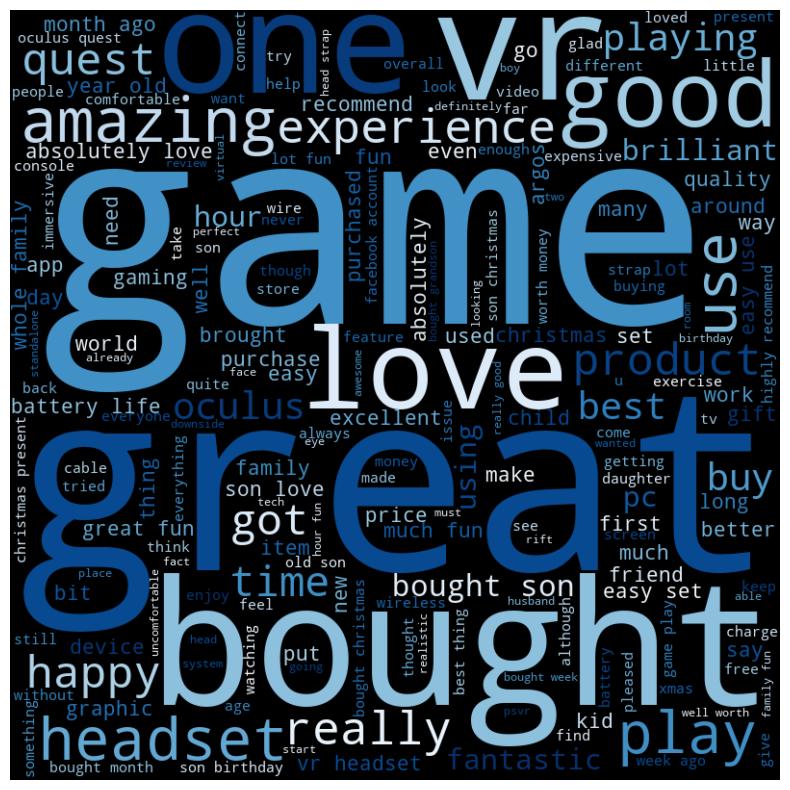

In [25]:
from wordcloud import WordCloud
from nltk.probability import FreqDist

wordcloud = WordCloud(background_color='black', colormap='Blues', width=800, height=800)

# Generate the wordcloud from the keywords
words = concatenate_words(df.reviews.to_list())
wordcloud.generate(words)

# Display the wordcloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We can see fron the Wordcloud that the Meta Quest 2 VR headset is linked with positive words such as "good", "great", "love" and "happy", this suggest that the headset is enjoyable to use and well-made. The word "family" also appears, indicating that the headset is enjoyed by multiple people in a household. The wordcloud suggests that the Meta Quest 2 VR headset is a well received and widely used product for a gift.

# 4. Sentiment Analysis
We want apply sentiment analysis to the reviews in order to extract and analyse the customer sentiment.

Sentiment analysis is the process of using computational methods to identify and classify opinions expressed in a text, with the aim of determining the writer's attitude towards a particular topic, product, or other subject. This process involves identifying and interpreting the emotions, opinions, or evaluations expressed in the text, and categorizing them as positive, negative, or neutral. [3]
Heres the following steps on how I calculated the sentiments of each review by using 'Vader' pre-trained model from NLTK and calculating the composite score:
<ol>
  <li>The <code>classify_sentiment</code> function takes a list of tokens as input and concatenates them into a single string using the <code>concatenate_words</code> function.</li>
  <li>If the input is not a string, the function returns a dictionary with default values for the sentiment and the percentages of positive, negative, and neutral sentiments.</li>
  <li>The function then instantiates a <code>SentimentIntensityAnalyzer</code> object from the <code>nltk.sentiment.vader</code> library and uses it to calculate the sentiment scores for the input string.</li>
  <li>The <code>calculate_sentiment_percent</code> function is called to calculate the percentages of positive, negative, and neutral sentiments using the sentiment scores.</li>
  <li>If the compound score (a composite score that takes into account the positive, negative, and neutral scores) is greater than or equal to 0.05, the function returns a dictionary with the sentiment label "positive" and the calculated percentages.</li>
  <li>If the compound score is less than or equal to -0.05, the function returns a dictionary with the sentiment label "negative" and the calculated percentages.</li>
  <li>If the compound score is between -0.05 and 0.05 (inclusive), the function returns a dictionary with the sentiment label "neutral" and the calculated percentages.</li>
  <li>If any errors occur during the execution of the function, a dictionary with default values for the sentiment and the percentages is returned.</li>
</ol>

In [26]:
# using sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def calculate_sentiment_percent(sentiment):
    # validates if the the dictionary has the correct keys pos, neg and neu   
    keys = {'pos', 'neg', 'neu'}
    if not keys.issubset(sentiment.keys()):
        raise ValueError('must have the following three keys: "pos", "neg", "neu"')
        
    # Calculate the percentage of positive, negative, and neutral sentiments
    total = sum(sentiment.values())
    pos_percent = sentiment['pos'] / total * 100
    neg_percent = sentiment['neg'] / total * 100
    neu_percent = sentiment['neu'] / total * 100
    
    # returns the percentage of positive, negative, and neutral sentiments
    return pos_percent, neg_percent, neu_percent

def classify_sentiment(tokens):
    text = concatenate_words(tokens)
    # validates if the the input is a string
    if not isinstance(text, str):
        return {'sentiment': 'N\A', 'pos_percent': 0, 'neg_percent': 0, 'neu_percent': 0}

    try:
        sid = SentimentIntensityAnalyzer()
        sentiment = sid.polarity_scores(text)

        pos_percent, neg_percent, neu_percent = calculate_sentiment_percent(sentiment)

        if sentiment['compound'] >= 0.05:
            return {'sentiment': 'positive', 'pos_percent': pos_percent, 'neg_percent': neg_percent, 'neu_percent': neu_percent}
        elif sentiment['compound'] <= -0.05:
            return {'sentiment': 'negative', 'pos_percent': pos_percent, 'neg_percent': neg_percent, 'neu_percent': neu_percent}
        else:
            return {'sentiment': 'neutral', 'pos_percent': pos_percent, 'neg_percent': neg_percent, 'neu_percent': neu_percent}
    except:
        return {'sentiment': 'N\A', 'pos_percent': 0, 'neg_percent': 0, 'neu_percent': 0}

In [27]:
df['sentiment'] = df.apply(lambda row: classify_sentiment(row['reviews'])['sentiment'], axis=1)

positive    91.679389
neutral      4.656489
negative     3.664122
Name: sentiment, dtype: float64


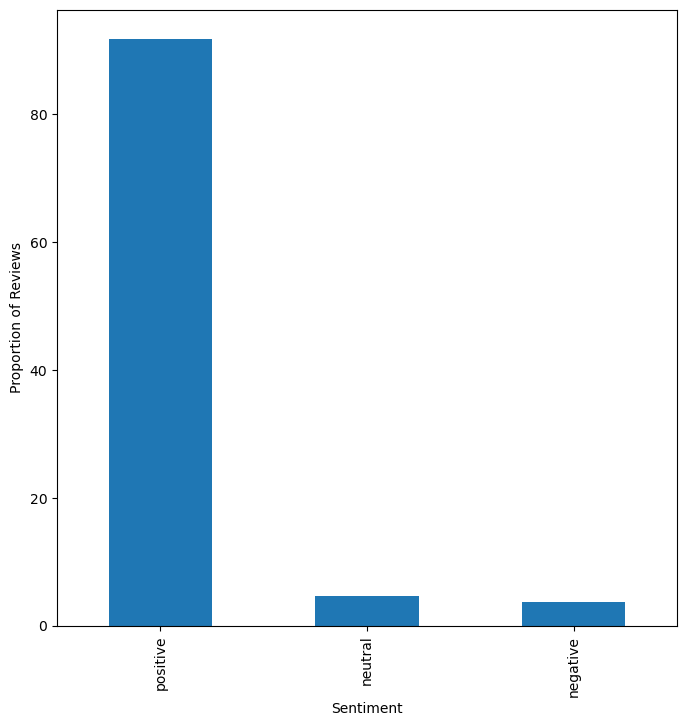

In [28]:
# calculate the proportions of reviews per sentiment (positive, negative and neutral)
counts = df['sentiment'].value_counts().sort_values(ascending=False) / len(df) * 100
print(counts)
fig = plt.figure(figsize=(8, 8))

# plot the counts as a bar plot
counts.plot(kind='bar')

# add label to the x axis
plt.xlabel('Sentiment')

# add label to the y axis
plt.ylabel('Proportion of Reviews')
# show the plot
plt.show()

It appears that the vast majority of reviews for the Meta Quest 2 are positive. This suggests that most people who have used the product are satisfied with it and have had a positive experience. It is also worth noting that a small percentage of reviews were neutral or negative, which suggests that there may be some issues or areas for improvement with the product. To further understand the sentiment of the reviews, we will extract the themes present in these sentiment to identify any potential issues or areas for improvement of this product.

We can see the results also allign with the positive words found in the word cloud such as "great", "good", "amazing".

In [29]:
pd.DataFrame(df.unfiltered_reviews[df.sentiment == "positive"].sample(5, random_state=123))

,unfiltered_reviews
171,"Really enjoyed the quest 2, it's fun and easy to use. I would say the only drawback is battery life but I guess it can't be helped in a self contained headset."
1001,I bought it few weeks ago and I am so happy.
1057,Best thing I have every had plus argos are all way here to help
972,Bought this for my son but the whole family use and have endless fun playing with it
38,"This is a cool little device. I bought it since my computer isn’t fully VR ready yet so it’s perfect! I would recommend, if you’re new to VR like me, to be aware you’ll need regular breaks since you will get dizzy and motion sickness. Also, start off sitting until you have gotten used to it. Overall great device!!"


We can see here some examples of positive reviews. Users mention being "very happy" and "really enjoyed" the device. We can see the model is able to correctly identify these reviews as having a positive sentiment.

In [30]:
pd.DataFrame(df.unfiltered_reviews[df.sentiment == "neutral"].sample(10, random_state=123))

,unfiltered_reviews
538,Ive seen the video clips on you tube but nothing can prepare you for what you will experiance once your in virtual reality
946,Strap him in a chair and watch the antics for the next hour....!!!!
307,Mind blowing experience
807,Future realistic device
982,I bought this 3week ago and it brill not used my Xbox
1165,Windows 11 as of now not compatible
334,Brought this as a birthday presentfor my son
960,My daughter is CNN made up with her new VR
1184,Ggghbbnnnnhhgfdtstdyd hc
218,Whole new world at your fingertips


Here we look at some reviews classified as neutral. We can see there are some errors in the classifications here.

For example the first review should be positive yet the language used is more complex and a deeper language understanding is needed. Review 1165 or 334 is a good example of a neutral review. Some reviews are not proper language such as 1184. 

In [31]:
pd.DataFrame(df.unfiltered_reviews[df.sentiment == "negative"].sample(10, random_state=123))

,unfiltered_reviews
557,"Bought this for my grandson’s birthday, never had so much fun in all my days, whole family can use it from 3/4 years to 100 worth every penny, must state though, some of the games can be a little pricey"
450,"Bought this a month or two ago, I’ve been on it non stop and the only thing thats negative is the battery life."
789,"Only 4 stars as the games are still phone looking based games or very Nintendo switch looking, there's nothing that looks like COD or HALO"
897,Bought from Argos because Currys didn't have the Oculus quest 2 even tho Currys was £55 cheaper but the service was horrendous
336,Never thought I would play games but this is on another level
1137,"Bought this and its been non stop table tennis battles, fantastic So realistic and for every level too!"
1095,Bought it for my daughter she is never of it she loves it the best thing ever she said
270,And it has the worst game in the world
401,"I must say as an adult I was just as excited to get this as my 14yr old son, after two weeks I’m now bored of it. Unless you are connecting to a gaming PC the graphics and game selection is poor. Battery life is around one hour."
177,"Bought this around a month ago, it's much superior to my now retired Rift S, no more dandling cables! Incredible exclusives such as resident evil, star wars,"


Here we look at some reviews classified as having a negative sentiment. Interestingly, looking at the first review 557, it starts off my complementing the device before stating the games can be pricey so the review has mixed sentiment. Similarly the second review is also mixed sentiment.

Some reviews are positive sentiment but with negative language such as "never" for review 336.

There are also examples of correctly classified negative reviews such as 270 and 401.

Things to improve would be to use a sentiment model that is able to understand more complex text such as a BERT style deep learning model and also to have a model that is able to classify mixed reviews.

Note the results also allign with the high rating (4.8 / 5) stars for the product.

# 5. Topic Modelling


We want to use topic modelling in order to understand tethe key topics that the reviews talk about. Topic Modelling is a technique that’s capable of scanning a set of documents, detecting word and phrase patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents [8]. In this notebook, we will be using the BERTopic algorithm for our topic modeling.

<code> Note that for BERTopic, many of the preprocessing steps for the review text are not required and should not be applied as the model can tokenize stop words and handles the lemmatization in the tokenization itself. </code>


## 5.1. Extracting Topics using BERTopic
BERTopic leverages deep learning transformer models that are used to extract embedding represrentations from text. The embeddings are then clustered through dimensionality reduction with UMAP and HDBSCA in an unsupervised learning approach. The main advantage is leveraging the powerful transformer model architectures that are able to understand the semantic meaning from text through the self-attention mechanism. [9].

In [32]:
#!pip install bertopic
from bertopic import BERTopic
from umap import UMAP

In [33]:
# stores the 'reviews' column to a list of documents
docs = df.unfiltered_reviews

# creates an instance of the UMAP model with specified parameters:
#  - n_neighbors: the number of nearest neighbors used in the UMAP algorithm
#  - n_components: the number of dimensions to reduce the data to using UMAP
#  - min_dist: the minimum distance between points in the UMAP space
#  - metric: the distance metric used to calculate distances in the UMAP space
#  - random_state: the seed for the UMAP random number generator (default seed I used is 43) PS: you might get different results from another machine.
umap_model = UMAP(n_neighbors=15, n_components=5, 
                  min_dist=0.0, metric='cosine', random_state=43)

# creates an instance of the BERT-based topic model, using the specified UMAP model as a dimensionality reduction method
topic_model = BERTopic(umap_model=umap_model)
# transforms the topic model on the list of documents, returning the identified topics and their probabilities
topics, probs = topic_model.fit_transform(docs)

In [34]:
# get_topic_info method is a member function of the BERTopic to retrieve information about the identified topics.
topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name
0,-1,389,-1_the_to_and_it
1,0,228,0_my_for_loves_it
2,1,107,1_games_for_and_to
3,2,92,2_vr_you_to_and
4,3,66,3_headset_vr_to_is
5,4,61,4_playing_for_fun_this
6,5,47,5_ago_month_bought_this
7,6,41,6_quest_the_oculus_so
8,7,33,7_happy_product_very_pleased
9,8,30,8_argos_service_always_thank


The results show the topics identified by the model, along with the topic count as well as a description of the topic. The "-1" topic is typically a noise term that should be ignored, as it is often used to represent documents that do not fit into any of the other identified topics. The remaining topics represent the main themes or topics present in the collection of documents which we will look into.

## 5.2. Detailed Topic Insight

We can add the representative reviews which are 3 reviews for each topic that best represent the topic.

In [35]:
# add review topics to dataframe
df["topic"] = topics

In [36]:
topic_info = topic_model.get_topic_info()
topic_info = topic_info[topic_info.Topic != -1]
topic_info['representative_doc'] = topic_info.apply(lambda x: topic_model.representative_docs_[x["Topic"]], axis=1)
topic_info = topic_info.explode('representative_doc')

In [37]:
topic_info[topic_info.Topic == 0]

,Topic,Count,Name,representative_doc
1,0,228,0_my_for_loves_it,"I bought this for my sons birthday, he absolutely loves it. It’s so realistic, I know as I have tried."
1,0,228,0_my_for_loves_it,"Bought for wee brother, absolutely loves it, great for children and adults"
1,0,228,0_my_for_loves_it,One of thebest gifts


Here the customer talks about buying the device as a gift, mainly for christmas and for their child and how they like the device.

In [38]:
topic_info[topic_info.Topic == 1]

,Topic,Count,Name,representative_doc
2,1,107,1_games_for_and_to,I bought this for my sons birthday - brilliant but of tech though the games are quite pricey - not many free things to choose from!
2,1,107,1_games_for_and_to,"I brought this couple weeks ago and loved it ever since, gamers are a little expensive for some but its like any console you buy!"
2,1,107,1_games_for_and_to,I really recommend it to anyone especially who likes xbox etc. this is 100 times better!


Here, the customer talks about the gaming aspect of the VR headset.

In [39]:
topic_info[topic_info.Topic == 2]

,Topic,Count,Name,representative_doc
3,2,92,2_vr_you_to_and,"I have wanted to get into VR for a while, this was an amazing starter set with alot of fun games and experiences, a little heavy after wearing for long periods of times"
3,2,92,2_vr_you_to_and,When I got the vr I was so excited to use and I would rate it a 10 out of 10 especially the games on there. Only one thing I don't like is the battery life is only about a hour if you use. If you do buy this I recommend you get a battery pack to get those long hours in.
3,2,92,2_vr_you_to_and,"I would have personally left 3 star as the interface is not so friendly for the first set up. But my children are fascinated with it and are using the VR all the time. It's working fine so far, and I admit is a good quality product."


Here, the customers talks about their enjoyment with the headset and how it is fun to play it with friends and family. the customer seems not to be fond of the battery life. They recommend getting a battery pack to extend the usage time

In [40]:
topic_info[topic_info.Topic == 3]

,Topic,Count,Name,representative_doc
4,3,66,3_headset_vr_to_is,Had this for around 1 month and its amazing. First VR headset ever and I must say they are now impressive. Couldnt tell you any difference between other vr headsets on the market but totally impressed with yhis. Only downside is the amount of battery life. Lasts 2-3 hours and then needs a good few hours to charge. Tbh tho theres a real world to explore aswell so a couple of hours should be plenty!!
4,3,66,3_headset_vr_to_is,I purchased this Headset as a birthday gift. It's amazing. Very clear graphics and long lasting battery.
4,3,66,3_headset_vr_to_is,I bought this VR headset and have no complaints. The headset works perfectly and there are no faults.


Here, the customers are happy with the purchase of the VR headset.

In [41]:
topic_info[topic_info.Topic == 4]

,Topic,Count,Name,representative_doc
5,4,61,4_playing_for_fun_this,My son loves this.. so much fun playing it.. well worth the money
5,4,61,4_playing_for_fun_this,I naught this for my sons birthday only a few weeks ago and we haven’t stopped playing. It brings so much fun and laughter. Highly recommend.
5,4,61,4_playing_for_fun_this,"Brought this for my son but i cant stop playing it myself, this is outstanding!"


Here the reviews are similar to the topic 0. They bought it for their son.

In [42]:
topic_info[topic_info.Topic == 5]

,Topic,Count,Name,representative_doc
6,5,47,5_ago_month_bought_this,i bought this a month ago and im so happy with it.
6,5,47,5_ago_month_bought_this,I bought this a month ago and am so happy that I did..
6,5,47,5_ago_month_bought_this,Bought this a week ago really happy


Here it seems reviews mention how they bought the device in the past, usually a few weeks or a month ago.

In [43]:
topic_info[topic_info.Topic == 6]

,Topic,Count,Name,representative_doc
7,6,41,6_quest_the_oculus_so,I sou happy for oculus quest 2
7,6,41,6_quest_the_oculus_so,Bought the quest 2 and really happy with it. Worth every penny.
7,6,41,6_quest_the_oculus_so,I bought this around a month ago. Wanted one for a long time the quest 2 is a fantastic bit of kit. The games i play graphics are good but could be better.


Here, the customers express their enthusiasm and happiness about the product.

In [44]:
topic_info[topic_info.Topic == 7]

,Topic,Count,Name,representative_doc
8,7,33,7_happy_product_very_pleased,Happy with the product
8,7,33,7_happy_product_very_pleased,am very happy for this product
8,7,33,7_happy_product_very_pleased,Very happy with product so far


Here, the reviews are short. they talk about how they enjoy the product.

In [45]:
topic_info[topic_info.Topic == 8]

,Topic,Count,Name,representative_doc
9,8,30,8_argos_service_always_thank,I have always been happy with everything I purchased from Argos
9,8,30,8_argos_service_always_thank,Very happy with my purchase I checked for availability online and found my closest argos had the item in stock I picked it up straight away hassle free great service thank you.
9,8,30,8_argos_service_always_thank,Amazing product and The Argos pickup were excellent as always. Quick and reliable service as always!


Here, it looks like the customers are very satisfied with the argos service.

In [46]:
topic_info[topic_info.Topic == 9]

,Topic,Count,Name,representative_doc
10,9,28,9_oculus_the_is_it,Bought Oculus and it’s great fun for the whole family
10,9,28,9_oculus_the_is_it,I've had the oculus for 3 weeks and it's crazy how you can see 360° all around up and down... I think everyone should try it
10,9,28,9_oculus_the_is_it,The oculus is amazing for all ages.


Here, it seems like the customers are talking about the VR headset specifically and are happy with the product

In [47]:
topic_info[topic_info.Topic == 10]

,Topic,Count,Name,representative_doc
11,10,27,10_family_fun_all_of,"All great works, we have a lot of fun as a family."
11,10,27,10_family_fun_all_of,Perfect for the for the entire family
11,10,27,10_family_fun_all_of,Great family fun!!!!!


Here, the reviews are very short, the customers seems to be having fun using the headset with family members.

In [48]:
topic_info[topic_info.Topic == 12]

,Topic,Count,Name,representative_doc
13,12,19,12_strap_it_is_but,"-The headstrap is fine, it doesnt feel too front heavy. -The battery life is fine, I get tired after one hour anyway -Any USB 3 rated for transfer can be used, don't buy the official one -Use a referral link to get store credit -The TOS is iffy but soon it should change as the Facebook account requirement is going to be removed"
13,12,19,12_strap_it_is_but,Product lives up to all the hype. It’s been amazing and I’ve spent hours on it already. The strap could be improved and perhaps the battery life and charging times too.
13,12,19,12_strap_it_is_but,The head strap is very easy to change size of it so all ages can use it.


Here, it looks like the customers are talking about the VR headset specifically They seem to not like the strap that comes with headset.

In [49]:
topic_info[topic_info.Topic == 13]

,Topic,Count,Name,representative_doc
14,13,18,13_immersive_games_nintendo_or,"It’s like you entered nintendo game inside, very quick booting and some incredible games, sport simulation like table tnis and golf is very realistic."
14,13,18,13_immersive_games_nintendo_or,The step up in immersion for the games compared to any screen based console or PC is astounding.
14,13,18,13_immersive_games_nintendo_or,I have had this for a few weeks now and wow it’s just a completely different way of gaming it’s a must I can’t praise it enough you can even enjoy Netflix cinema style


Here, the customers are talking about  how the headset provides an immersive experience.

In [50]:
topic_info[topic_info.Topic == 14]

,Topic,Count,Name,representative_doc
15,14,17,14_experience_fun_brilliant_wasnt,It wasn’t that bad but it wasn’t that great
15,14,17,14_experience_fun_brilliant_wasnt,Happy with it it’s a lot fun.
15,14,17,14_experience_fun_brilliant_wasnt,Absolutely brilliant. Exactly as described.


Here, the reviews are very short. They enjoyed the product and the expections were met.

In [51]:
topic_info[topic_info.Topic == 15]

,Topic,Count,Name,representative_doc
16,15,16,15_exercise_fitness_and_for,"This is easily the best purchase ever, including my car and house. I bought this for my son for Xmas but it would seem I am the kid of the house. I downloaded thrill of the fight boxing and I can't keep off it. Its the best exercise I have ever done its motivational and addictive because I don't like to lose. I've lost around 8 ibs in 2 weeks. Highly recommend this product"
16,15,16,15_exercise_fitness_and_for,Worth it just for the fun and exercise
16,15,16,15_exercise_fitness_and_for,It’s excellent for family and friends good fitness as well as very active


This topic is talking about how people use the device for exercise and fitness.

In [52]:
topic_info[topic_info.Topic == 16]

,Topic,Count,Name,representative_doc
17,16,12,16_kids_love_fun_ages,Kids love it life like
17,16,12,16_kids_love_fun_ages,Kids love it great fun to play
17,16,12,16_kids_love_fun_ages,"Best thing to keep kids quiet, it's amazing"


Here, the reviews talk about how they love it.

In [53]:
topic_info[topic_info.Topic == 17]

,Topic,Count,Name,representative_doc
18,17,12,17_kit_piece_of_bit,"My son is extremely happy with this, a brill bit of kit"
18,17,12,17_kit_piece_of_bit,"Great bit of kit,great fun."
18,17,12,17_kit_piece_of_bit,Amazing piece of kit


Here the reviews seem to refer to the device as kit.

In [54]:
topic_info[topic_info.Topic == 18]

,Topic,Count,Name,representative_doc
19,18,11,18_good_great_easy_item,Ordering and collection was very quick and easy.
19,18,11,18_good_great_easy_item,Wow very nice well worth buying
19,18,11,18_good_great_easy_item,Excellent value for money. Happy customer would definitely recommend


Here, the reviews talks about how the product is excellent quality price.

In [55]:
topic_info[topic_info.Topic == 19]

,Topic,Count,Name,representative_doc
20,19,11,19_battery_product_life_family,"Bought this a month or two ago, I’ve been on it non stop and the only thing thats negative is the battery life."
20,19,11,19_battery_product_life_family,Awesome to use but I had a pixel go out and had to send the product back to manufacturers…. Waiting for a replacement
20,19,11,19_battery_product_life_family,"Best thing we have bought and fantastic for all the family. We’ve spent hours on this since we got it. Just wish it had a longer battery life so it didn’t need changing as much, as were that addicted!"


Here, the reviews notes that the battery life is not ideal

In [56]:
topic_info[topic_info.Topic == 20]

,Topic,Count,Name,representative_doc
21,20,11,20_moon_over_hes_with,I bought this for my son for Christmas and he was over the moon and has enjoyed every minute of it.
21,20,11,20_moon_over_hes_with,I bought this a few weeks ago for my grandsons birthday today and he is absolutely made up with it. He’s over the moon
21,20,11,20_moon_over_hes_with,Bought this for myself as a gift and honestly over the moon Santa came early


Here users refer to being "over the moon" with the device and very pleased.

In [57]:
topic_info[topic_info.Topic == 21]

,Topic,Count,Name,representative_doc
22,21,10,21_the_you_to_of,"I use and develop software/content for VR systems at work, and I must say, the Oculus Quest 2 is a very polished product. It's a great experience that generally just works, as opposed to some other systems, and is easy enough to set up and get going. You don't need a PC, and there aren't any cables (apart from when you're charging it of course). The only reason I didn't give it 5 stars is because you need a Facebook/Meta account to use it."
22,21,10,21_the_you_to_of,"Pros: It's pretty easy to set up (there are useful 'how to get started' videos on YouTube) and to use. Once you've got it set up, you'll find some intros that take you through what it can do and how to use it. It comes with preloaded experiences and demo versions of games so you'll have stuff to keep you busy for a while (I've had mine three weeks and still haven't seen and done everything on it). There's a variety of things to do. Apart from games and fitness classes, I've been snowboarding, experienced a parachute jump, raced a motorbike and visited places I've never been before (plus a few I have). You'll go ""Wow"" at least once. Cons: Oculus is owned by Facebook and you need a facebook account to use it. You'll want to buy full versions of some of the games, as well as new stuff, and these are not cheap. It's a bit glitchy - it can freeze, for example - but most problems are resolved by restarting it (the Oculus website is quite useful, you can even chat to a real person). Spending hours in virtual reality might be a bit antisocial to people around you. Overall, I'm pleased with it and have used it nearly every day. If you've never experienced immersive VR before, you'll find it very different from anything else - including 3D. But that's what makes you go ""wow""."
22,21,10,21_the_you_to_of,"After trying out virtual reality 2 years ago, I have wanted my own ever since. I finally made the decision and bought one this year before Christmas to guarantee some funny moments with the family and I am so happy I did! Virtual reality is definitely an out of this world experience that I believe everyone has to try at least once! This Oculus is the best option as it is wireless with battery life of around 2 hours, has 3 different lenses that you can click through on the goggles to match each persons eyesight so it’s not blurry, you can cast your experience to another device so your friends/family can also experience it too, has a large store of many games to buy and a few that are even free, and tons of video experiences; my favourite so far being walking alongside Blue from Jurassic World and seeing a T-Rex. If you’re thinking about buying, it’s definitely worth it!"


Here we notice that the length of the reviews is significantly longer with users going into more detail.

## 5.3. Summary of identified topics
We saw many reviews talk about the VR headset and general positive experience. Many talk about the family aspect of buying the game as a present, which alligns with timeseries analysis peak during chistmas period.

We saw other topics such as strap, exercise, battery life. the customers seems to complain about the battery life. we can further investigate it by breaking down sentiment by topic.

## 5.4. Analysing Sentiment by Topic
We will breakdown the sentiment by topic so that we can see how the sentiment of the reviews differs across different topics. 

### 5.4.1. Breakdown sentiment by topic

Breaking down sentiment by topic means analyzing the sentiment of the reviews for each topic separately. Here's the procedure to break it down:

<ol>
    <li>Create an empty dictionary called <code>topic_sentiment </code> </li>
  <li>Group the data in the <code>df</code> DataFrame by the "topic" column</li>
  <li>For each group of data in the "df" DataFrame:
    <ul>
      <li>Assign the "sentiment" column of the group to a variable called <code> df_ </code></li>
      <li>Calculate the percentage of each sentiment value in <code> df_ </code> and store the results in <code> topic_sentiment </code> with the group's "topic" as the key</li>
    </ul>
  </li>
  <li>Convert <code> topic_sentiment </code> to a DataFrame and display it</li>
</ol>

The resulting DataFrame will have one row for each topic and columns for each sentiment value and the corresponding percentage.

In [58]:
# breakdown sentiment by topic
topic_sentiment = {}
for topic, df_ in df.groupby("topic"):
    topic_sentiment[topic] = df_["sentiment"].value_counts() / len(df_) * 100
pd.DataFrame(topic_sentiment)

,-1,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
negative,3.341902,3.070175,3.738318,5.434783,NaN,6.557377,10.638298,NaN,NaN,3.333333,...,NaN,5.555556,NaN,6.25,NaN,NaN,NaN,9.090909,NaN,10.0
neutral,5.398458,8.771930,1.869159,4.347826,NaN,3.278689,4.255319,NaN,NaN,NaN,...,NaN,NaN,5.882353,6.25,NaN,NaN,NaN,NaN,54.545455,NaN
positive,91.259640,88.157895,94.392523,90.217391,100.0,90.163934,85.106383,100.0,100.0,96.666667,...,100.0,94.444444,94.117647,87.50,100.0,100.0,100.0,90.909091,45.454545,90.0


To better understand the results, we will create a visualization to represent the sentiment per topic more intuitively.

### 5.4.2. Visualize Sentiment per Topic

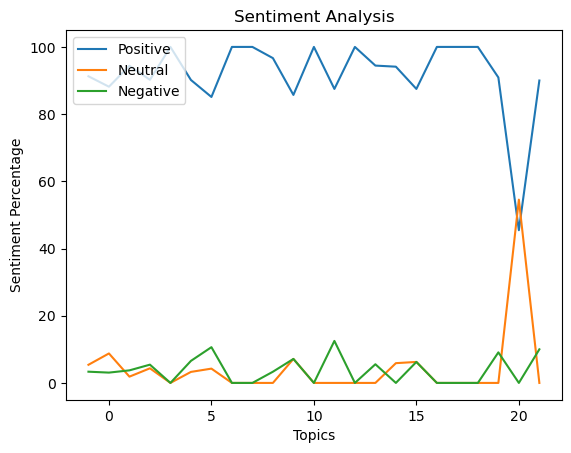

In [59]:
import matplotlib.pyplot as plt

# get the values from the topic_sentiment dict and store them in separate lists
x_values = list(topic_sentiment.keys())
positive_values = []
neutral_values = []
negative_values = []

# iterates through the dictionary topic_sentiment
# extract the values for the keys "positive", "neutral", and "negative"
# for each key-value pair.
# If a key does not exist in the value, it appends 0 to the corresponding lists (pos, neg or neu lists above)
for key, value in topic_sentiment.items():
    if 'positive' in value:
        positive_values.append(value['positive'])
    else:
        positive_values.append(0)
    if 'neutral' in value:
        neutral_values.append(value['neutral'])
    else:
        neutral_values.append(0)
    if 'negative' in value:
        negative_values.append(value['negative'])
    else:
        negative_values.append(0)

# create the line chart
plt.plot(x_values, positive_values, label='Positive')
plt.plot(x_values, neutral_values, label='Neutral')
plt.plot(x_values, negative_values, label='Negative')

# add a title and axis labels
plt.title('Sentiment Analysis')
plt.xlabel('Topics')
plt.ylabel('Sentiment Percentage')

# add a legend
plt.legend(loc='upper left')

# show the plot
plt.show()

it appears that there is a significant decline at topic 20 in the percentage of positive sentiment and an increase in neutral. This confirms that there are issues with the battery life of the Meta Quest 2 that are causing dissatisfaction among users.

# 6.External Validation
Incorporating independent findings into our conclusions is essential for ensuring the validity and credibility of our study. By consulting external evidence, we can validate our own conclusions. Additionally, considering multiple perspectives and professional respectable sources can help us to better understand the concerns of the product.

According to PCMag [13], battery life is one of the main issues for standalone VR headsets, including the Meta Quest 2. CNET [14] reports that the headset has a battery life of two to three hours, which may not be sufficient for longer play sessions. Techspot [15] lists the short battery life as a con of the headset, stating that it only lasts for two to three hours. Mashable [16] also notes that the battery life of the Meta Quest 2 VR headset could be longer. These findings from independent tech industry sources [13, 14, 15, 16] suggest that battery life may be a concern for users of the Meta Quest 2 VR headset.

# 7.Conclusion
Our analysis of customer reviews of the Meta Quest 2 VR headset revealed that battery life was a common concern among users. Upon conducting sentiment analysis on this topic, we observed a decline in positive sentiments and an increase in neutral sentiments in the topic about battery. This trend suggests that the battery lifespan of the Meta Quest 2 VR headset may be perceived as short by users. To further confirm our findings, we consulted multiple well-respected tech industry sources, including PCMag [13], CNET [14], Techspot [15], and Mashable [16], which all identified battery life as a common drawback of the Meta Quest 2 VR headset. 

In summary, our study concluded that the battery lifespan of the Meta Quest 2 VR headset has a potential area for improvement. as supported by both our analysis on the customer reviews and independent sources.

# 8.Future Work

- Explore neural network models for sentiment analysis and compare their performance to the current method which we saw struggled in certain situations.
- Explore neural network models for text summarization to summarize topics per review and potentially per sentiment. 
- Parse data for other products to be able to compare results across products.
 


# 9.References and Resources
## 9.1.References

### General
- Topic modelling inspired from https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6
- Sentiment Analysis inspired from https://www.analyticsvidhya.com/blog/2022/10/sentiment-analysis-using-vader/
- [1] Sentiment analysis: Why it's necessary and how it improves CX from https://www.techtarget.com/searchcustomerexperience/tip/Sentiment-analysis-Why-its-necessary-and-how-it-improves-CX 
- [2] Meta Quest 2 Good price for value from https://arstechnica.com/gaming/2022/07/despite-100-price-increase-meta-quest-2-still-offers-historically-cheap-vr/
- [3] Sentiment Analysis definition from https://en.wikipedia.org/wiki/Sentiment_analysis
- [4] Topic modelling definition from https://en.wikipedia.org/wiki/Topic_model
- [7] Selenium definition from https://www.guru99.com/introduction-to-selenium.html
- [8] Topic Modelling definition from https://monkeylearn.com/blog/introduction-to-topic-modeling/ 
- [9] BERTopic definition and topic outlier https://maartengr.github.io/BERTopic/faq.html
- [10] KeyBERT and BERTopic from https://maartengr.github.io/KeyBERT/
- [11] Lemmatize definition from https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
- [12] Keywords definition from https://maartengr.github.io/KeyBERT/api/keybert.html

###  Ethical considerations 
- [5] Argos terms and conditions from https://www.argos.co.uk/help/terms-and-conditions/
- [6] Argos robots.txt from https://www.argos.co.uk/robots.txt

### External Validation and Conclusion

- [13] PCMag Oculus Quest 2 review from https://www.pcmag.com/reviews/oculus-quest-2
- [14] CNET Oculus Quest 2 review from https://www.cnet.com/tech/gaming/facebook-oculus-quest-2-vr-review-one-of-my-favorite-game-consoles/
- [15] Techspot Oculus Quest 2 review from https://www.techspot.com/products/audio-video/oculus-quest-2.224801/
- [16] Mashable Oculus Quest 2 review from https://mashable.com/review/oculus-quest-2-review 

## 9.2.Code
### General
- Using lambda function with Pandas DataFrames from https://pandas.pydata.org/pandas-docs/stable/user_guide/apply.html
- Lambda function with pandas DataFrame from : www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/
- Error Handling and Defensive coding from Dr. Matthew Yee-King CM2010 Software Design And Development Topic 3

### Web Scraping 
- 5.13 Webscraping and APIs with Llewelyn Fernandes
- Selenium waits from https://selenium-python.readthedocs.io/waits.html
- Worked examples of lambda function from https://sparkbyexamples.com/pandas/pandas-apply-with-lambda-examples/
- Validating string from https://bobbyhadz.com/blog/python-validate-string-input

### Data and Text Preprocessing 
- Converting string to datetime format and object inspired from https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior
- Removing special charactres and punctuations code inspired from https://stackoverflow.com/questions/18429143/strip-punctuation-with-regex-python 
- Removing stop words inspired from https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
- Lemmatizing using NLTK from https://www.geeksforgeeks.org/python-lemmatization-with-nltk/
- removing stop words with NLTK from https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

### Sentiment Analysis
- Revision lab 3 - pre-processing text Dr. Sean McGrath
- Sentiment Analysis using Vader from https://www.nltk.org/api/nltk.sentiment.vader.html
- Sentiment Analysis calculatuing compound score from https://github.com/cjhutto/vaderSentiment#about-the-scoring

### Topic Modelling
- Topic Modelling with BERT from https://towardsdatascience.com/topic-modeling-with-bert-779f7db187e6
- Dinensionality reduction from https://en.wikipedia.org/wiki/Dimensionality_reduction
- BERTopic from https://spacy.io/universe/project/bertopic
- BERTopic, Getting the same results https://maartengr.github.io/BERTopic/faq.html#why-are-the-results-not-consistent-between-runs
- BERTopic, Calculate topics probability from https://maartengr.github.io/BERTopic/faq.html#how-do-i-calculate-the-probabilities-of-all-topics-in-a-document

### Visualization
- BERTopic Visualization from https://maartengr.github.io/BERTopic/getting_started/visualization/visualization.html
- Wordcloud inspiration from https://www.kaggle.com/code/anandhuh/word-cloud-in-python-for-beginners